# Considerations when Clustering with K-Means

In [1]:
# Import numpy
import numpy as np

# Import pandas
import pandas as pd
pd.set_option('display.max_columns', None)

# Import seaborn
import seaborn as sns
%matplotlib inline

# Apply the default theme
sns.set_theme()

# Import scikit-learn
from sklearn.cluster import KMeans

# Feature Scaling
K-Means uses an euclidean distance measure to assign points to clusters. This measure doesn't take other context such as units or scale, into account. Therefore, if certain features have drastically higher magnitudes than others, these tend to dominate during point assignment.

<br />

<img src="../images/euclid_distance.png" alt="" width="300"/>

<br />

For example, say you wanted to cluster new college graduates by `age` and `income`. If you did not scale the features, then `income` would be the dominate feature used for computing distance. 

| id | age | income    |
|:--:|:---:|:---------:|
| 1  | 25  | 30,000    |
| 2  | 26  | 32,000    |
| 3  | 23  | 40,000    |
| 4  | 22  | 54,000    |
| 5  | 28  | 41,000    |

In [2]:
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html
x = np.random.randn(2000) * 100
x

array([-75.77251725, 124.46527352,  76.60757705, ...,   1.5448557 ,
        55.58728673, -33.50055853])

In [3]:
y = np.concatenate([np.random.randn(1000), np.random.randn(1000) + 5])
#y = np.random.randn(2000)

In [4]:
df = pd.DataFrame({
    'x': x,
    'y': y,
})

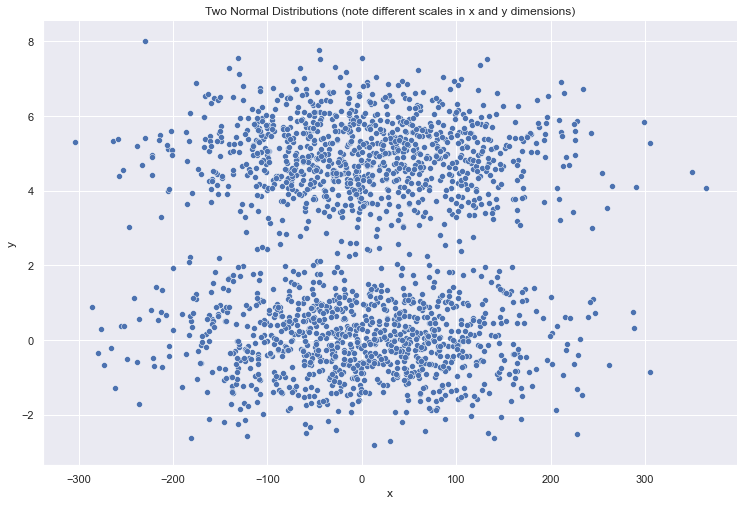

In [5]:
scatter = sns.relplot(
    data=df, 
    x="x", 
    y="y", 
    kind="scatter",
    height=7,
    aspect=1.5, 
).set(
    title="Two Normal Distributions (note different scales in x and y dimensions)"
)

In [6]:
x = df.loc[:,['x', 'y']].values
x

array([[-75.77251725,  -0.22861948],
       [124.46527352,  -0.55453442],
       [ 76.60757705,   1.55491617],
       ...,
       [  1.5448557 ,   3.57839601],
       [ 55.58728673,   4.56876085],
       [-33.50055853,   6.40782366]])

In [7]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
km = KMeans(
    n_clusters = 2,
)

clusters = km.fit_predict(x)

clusters

array([1, 0, 0, ..., 1, 0, 1], dtype=int32)

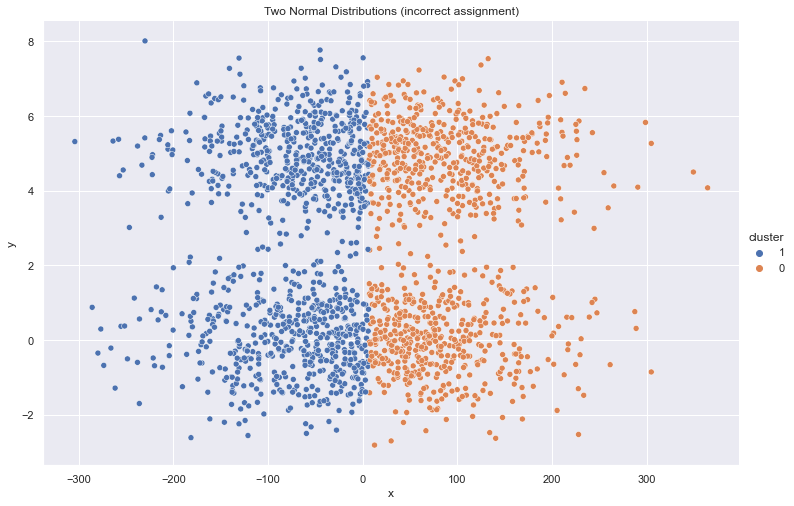

In [8]:
df['cluster'] = pd.Series(clusters).astype('str')

scatter = sns.relplot(
    data=df, 
    x="x", 
    y="y", 
    hue="cluster",
    kind="scatter",
    height=7,
    aspect=1.5, 
).set(
    title="Two Normal Distributions (incorrect assignment)"
)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
x

array([[-75.77251725,  -0.22861948],
       [124.46527352,  -0.55453442],
       [ 76.60757705,   1.55491617],
       ...,
       [  1.5448557 ,   3.57839601],
       [ 55.58728673,   4.56876085],
       [-33.50055853,   6.40782366]])

In [11]:
y = StandardScaler().fit_transform(x)
y

array([[-7.73793092e-01, -1.01538112e+00],
       [ 1.22880450e+00, -1.13698345e+00],
       [ 7.50175029e-01, -3.49924973e-01],
       ...,
       [-5.34536801e-04,  4.05056907e-01],
       [ 5.39949064e-01,  7.74572576e-01],
       [-3.51027128e-01,  1.46074649e+00]])

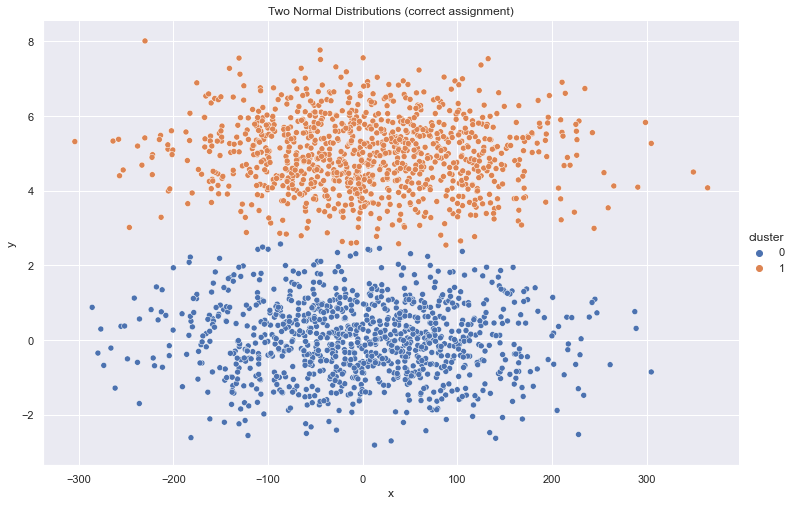

In [12]:
clusters = km.fit_predict(y)

df['cluster'] = pd.Series(clusters).astype('str')

scatter = sns.relplot(
    data=df, 
    x="x", 
    y="y", 
    hue="cluster",
    kind="scatter",
    height=7,
    aspect=1.5, 
).set(
    title="Two Normal Distributions (correct assignment)"
)

# High-dimensional data a.k.a. the "curse of dimensionality"
High-dimensional Euclidean spaces exhibit several properties that are sometimes referred to as the "curse of dimensionality". One manifestation of the "curse" is that in high dimensions, almost all pairs of points are equally far away from one another.

In order to demonstrate the "curse of dimensionality", we can plot the distribution of pairwise distances for 200 points represented in different dimensions. If there are essentially no pairs of points that are close, it is hard to build clusters at all. There is little justification for grouping one pair of points and not another.

In [13]:
from sklearn.metrics import DistanceMetric

In [14]:
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html
x = np.random.randn(200)
y = np.random.randn(200)

### Low Dimensional data (n=2)

In [15]:
low_dim_df = pd.DataFrame({
    'x': x,
    'y': y
})

low_dim_df.head()

,x,y
0,-0.513282,0.735483
1,-0.696238,-0.513701
2,-0.294189,-1.936040
3,0.708107,0.500730
4,-2.296340,1.620988


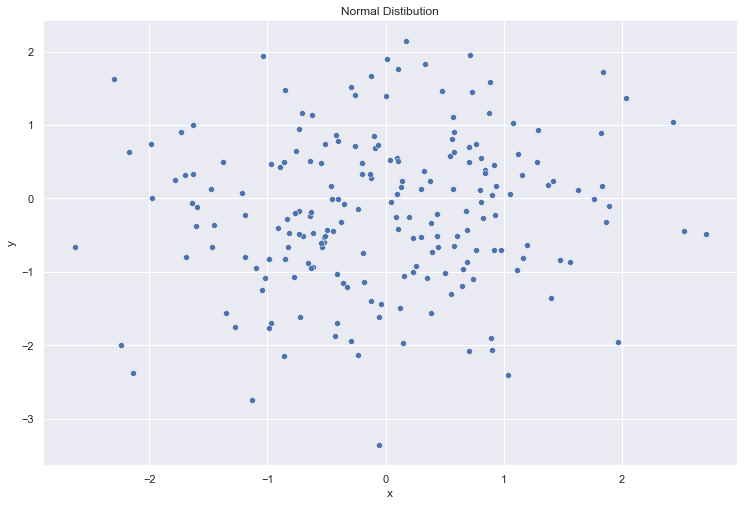

In [16]:
scatter = sns.relplot(
    data=low_dim_df, 
    x="x", 
    y="y", 
    kind="scatter",
    height=7,
    aspect=1.5, 
).set(
    title="Normal Distibution"
)

In [17]:
x = low_dim_df.loc[:, ['x', 'y']].values
x.shape

(200, 2)

In [18]:
pairs = DistanceMetric.get_metric("euclidean").pairwise(x)
pairs

array([[0.        , 1.26251112, 2.68049166, ..., 1.63515024, 1.42905992,
        1.99882248],
       [1.26251112, 0.        , 1.47806978, ..., 2.13259679, 2.42013801,
        1.42969662],
       [2.68049166, 1.47806978, 0.        , ..., 2.91000932, 3.53000487,
        1.45894811],
       ...,
       [1.63515024, 2.13259679, 2.91000932, ..., 0.        , 0.91965146,
        1.52934785],
       [1.42905992, 2.42013801, 3.53000487, ..., 0.91965146, 0.        ,
        2.30274042],
       [1.99882248, 1.42969662, 1.45894811, ..., 1.52934785, 2.30274042,
        0.        ]])

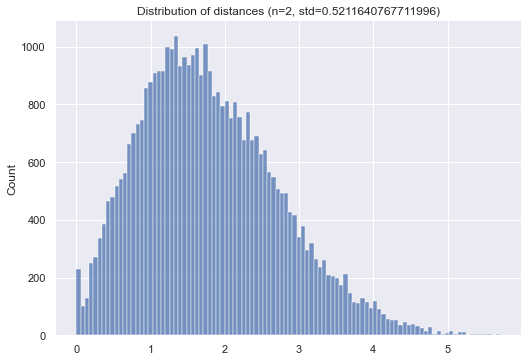

In [19]:
def distance_histogram(data, n):
    pairs_plot = data
    pairs_std_mean_ratio = pairs_plot.std() / pairs_plot.mean()

    hist = sns.displot(
        data=pairs.flatten(), 
        kind="hist", 
        aspect=1.5,
        bins=100,
    ).set(
        title=f"Distribution of distances (n={n}, std={pairs_std_mean_ratio})"
    )
    
distance_histogram(pairs.flatten(), 2)

### n=10
Note: We cannot visualize this dataset with seaborn easily

In [20]:
dims = []
for i in range(10):
    dims.append(np.random.randn(200))

In [21]:
x = np.vstack(tuple(dims)).T

In [22]:
x.shape

(200, 10)

In [23]:
pairs = DistanceMetric.get_metric("euclidean").pairwise(x)
pairs

array([[0.        , 4.51897998, 4.23396866, ..., 5.32282372, 3.79544832,
        3.5523781 ],
       [4.51897998, 0.        , 5.95543063, ..., 4.9524837 , 2.5648798 ,
        3.14042935],
       [4.23396866, 5.95543063, 0.        , ..., 6.01963247, 5.78485529,
        5.2263144 ],
       ...,
       [5.32282372, 4.9524837 , 6.01963247, ..., 0.        , 5.81088388,
        5.31242973],
       [3.79544832, 2.5648798 , 5.78485529, ..., 5.81088388, 0.        ,
        3.54687252],
       [3.5523781 , 3.14042935, 5.2263144 , ..., 5.31242973, 3.54687252,
        0.        ]])

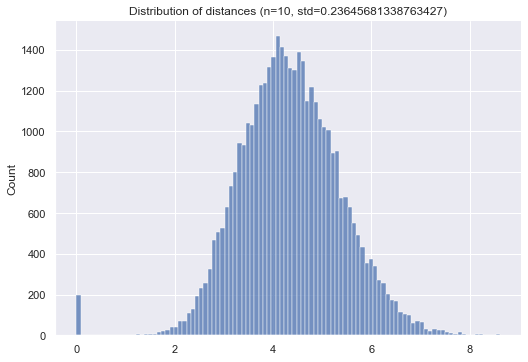

In [24]:
distance_histogram(pairs.flatten(), n=10)

### n=100

In [25]:
dims = []
for i in range(100):
    dims.append(np.random.randn(200))

In [26]:
x = np.vstack(tuple(dims)).T

In [27]:
x.shape

(200, 100)

In [28]:
pairs = DistanceMetric.get_metric("euclidean").pairwise(x)
pairs

array([[ 0.        , 14.07795919, 14.07972067, ..., 14.15372718,
        14.3808958 , 13.38906876],
       [14.07795919,  0.        , 13.43712102, ..., 13.82550017,
        13.98618492, 14.62765384],
       [14.07972067, 13.43712102,  0.        , ..., 15.00238371,
        13.95120005, 13.11074351],
       ...,
       [14.15372718, 13.82550017, 15.00238371, ...,  0.        ,
        12.8976608 , 12.92963411],
       [14.3808958 , 13.98618492, 13.95120005, ..., 12.8976608 ,
         0.        , 12.56211132],
       [13.38906876, 14.62765384, 13.11074351, ..., 12.92963411,
        12.56211132,  0.        ]])

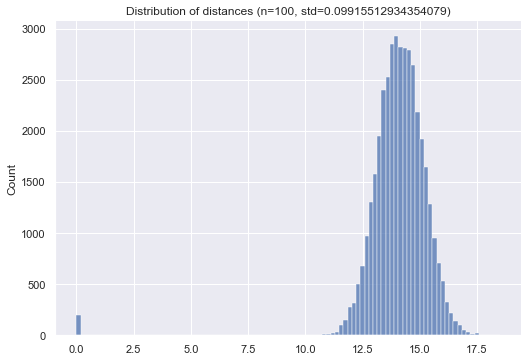

In [29]:
distance_histogram(pairs.flatten(), n=100)

### n=1000

In [30]:
dims = []
for i in range(1000):
    dims.append(np.random.randn(200))

In [31]:
x = np.vstack(tuple(dims)).T

In [32]:
x.shape

(200, 1000)

In [33]:
pairs = DistanceMetric.get_metric("euclidean").pairwise(x)
pairs

array([[ 0.        , 44.50647207, 45.53041518, ..., 44.85703514,
        45.100602  , 43.90277853],
       [44.50647207,  0.        , 44.97253846, ..., 43.81684358,
        43.75849994, 44.68828926],
       [45.53041518, 44.97253846,  0.        , ..., 45.83943648,
        44.69377901, 46.79739318],
       ...,
       [44.85703514, 43.81684358, 45.83943648, ...,  0.        ,
        45.13855166, 46.43710985],
       [45.100602  , 43.75849994, 44.69377901, ..., 45.13855166,
         0.        , 45.05550598],
       [43.90277853, 44.68828926, 46.79739318, ..., 46.43710985,
        45.05550598,  0.        ]])

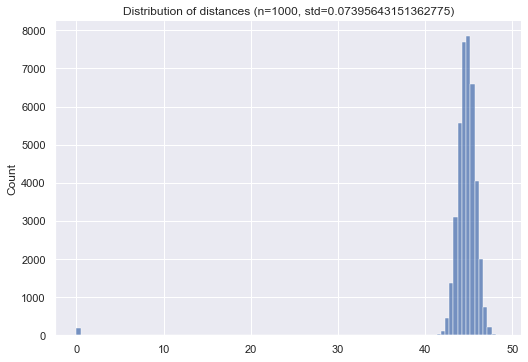

In [34]:
distance_histogram(pairs.flatten(), 1000)